In [6]:
BASE = "../analysis/"

import os
os.makedirs(BASE, exist_ok=True)

In [7]:
import pandas as pd

matriz = pd.read_csv(BASE + "matriz_presencia_ausencia_amr.csv", index_col=0)

matriz.head()

,aac(3)-IId,aac(3)-IIe,aadA16,aadA2,almE,almF,almG,aph(3'')-Ib,aph(3')-Ia,aph(6)-Id,...,qnrVC5,sul1,sul2,tet(34),tet(35),tet(59),tet(A),tet(B),tet(D),varG
Species,,,,,,,,,,,,,,,,,,,,,
V_alginolyticus,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
V_cholerae,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,1,0,1,1
V_parahaemolyticus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,1,1,0,1,0,0
V_vulnificus,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,1,1,0,0,0


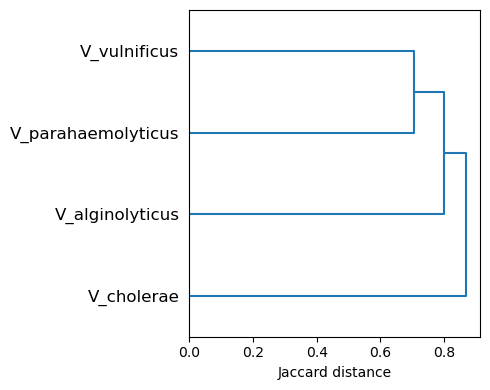

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

dist = pdist(matriz.values, metric="jaccard")
link = linkage(dist, method="average")

plt.figure(figsize=(5,4))
dendrogram(link, labels=matriz.index, orientation="right")

plt.xlabel("Jaccard distance")
plt.tight_layout()
plt.savefig(BASE + "dendrogram_resistoma.png", dpi=300)
plt.show()

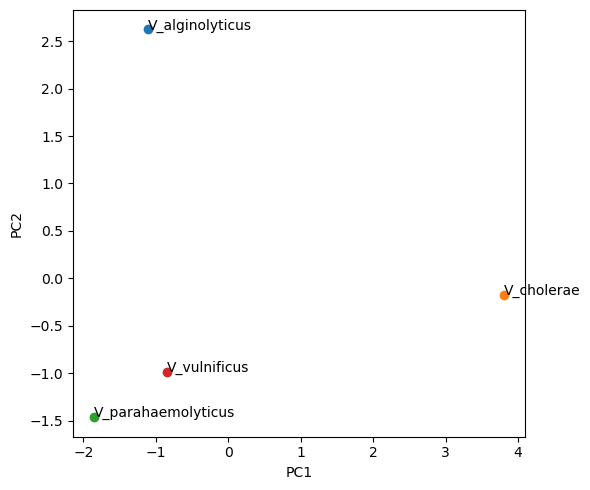

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
coords = pca.fit_transform(matriz)

df_pca = pd.DataFrame(coords, index=matriz.index, columns=["PC1","PC2"])

plt.figure(figsize=(6,5))

for sp in df_pca.index:
    plt.scatter(df_pca.loc[sp,"PC1"], df_pca.loc[sp,"PC2"])
    plt.text(df_pca.loc[sp,"PC1"], df_pca.loc[sp,"PC2"], sp)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()

plt.savefig(BASE + "pca_resistoma.png", dpi=300)
plt.show()

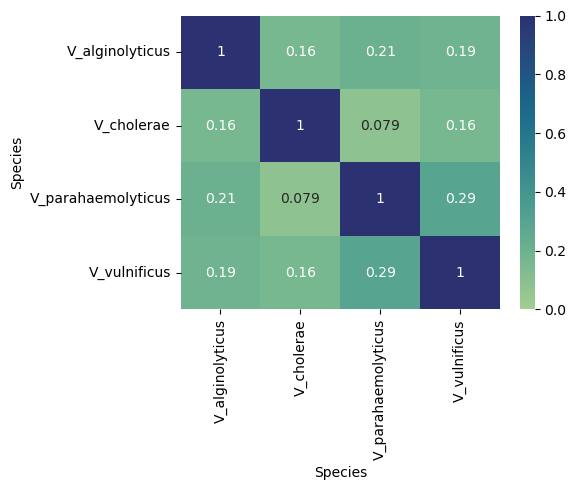

In [10]:
from sklearn.metrics import pairwise_distances
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔥 convertir a booleano (CLAVE)
mat_bool = matriz.astype(bool)

dist = pairwise_distances(mat_bool.values, metric="jaccard")
sim = 1 - dist

sim_df = pd.DataFrame(sim, index=matriz.index, columns=matriz.index)

plt.figure(figsize=(6,5))
sns.heatmap(sim_df, annot=True, cmap="crest", vmin=0, vmax=1)
plt.tight_layout()
plt.savefig(BASE + "similitud_jaccard.png", dpi=300)
plt.show()

In [3]:
import pandas as pd

BASE = "../analysis/"

amr = pd.read_csv(BASE + "amrfinder_clean.tsv", sep="\t")
amr.head()

,Protein id,Contig id,Start,Stop,Strand,Element symbol,Element name,Scope,Type,Subtype,...,Target length,Reference sequence length,% Coverage of reference,% Identity to reference,Alignment length,Closest reference accession,Closest reference name,HMM accession,HMM description,Species
0,NaN,NZ_CP026041.1,2639419,2641017,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.81,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
1,NaN,NZ_CP026041.1,3109082,3109543,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus
2,NaN,NZ_CP026042.1,967271,968119,+,blaCARB-30,carbenicillin-hydrolyzing class A beta-lactama...,core,AMR,AMR,...,283,283,100.0,100.00,283,WP_005498292.1,carbenicillin-hydrolyzing class A beta-lactama...,NaN,NaN,V_parahaemolyticus
3,NaN,NZ_CP009982.1,2081630,2083228,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.25,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
4,NaN,NZ_CP009982.1,2553486,2553947,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus


In [11]:
BASE = "../analysis/resistome/"

amr = pd.read_csv(BASE + "amrfinder_all_species.tsv", sep="\t")

In [12]:
amr.columns

Index(['Protein id', 'Contig id', 'Start', 'Stop', 'Strand', 'Element symbol',
       'Element name', 'Scope', 'Type', 'Subtype', 'Class', 'Subclass',
       'Method', 'Target length', 'Reference sequence length',
       '% Coverage of reference', '% Identity to reference',
       'Alignment length', 'Closest reference accession',
       'Closest reference name', 'HMM accession', 'HMM description'],
      dtype='object')

In [13]:
import glob
import os
import pandas as pd

BASE = "../analysis/resistome/"

archivos = glob.glob(BASE + "V_*_amrfinder.tsv")

dfs = []

for f in archivos:
    df = pd.read_csv(f, sep="\t")
    especie = os.path.basename(f).replace("_amrfinder.tsv", "")
    df["Species"] = especie   # ← AQUÍ agregas la especie
    dfs.append(df)

amr = pd.concat(dfs, ignore_index=True)

print(amr.columns)
amr.head()

Index(['Protein id', 'Contig id', 'Start', 'Stop', 'Strand', 'Element symbol',
       'Element name', 'Scope', 'Type', 'Subtype', 'Class', 'Subclass',
       'Method', 'Target length', 'Reference sequence length',
       '% Coverage of reference', '% Identity to reference',
       'Alignment length', 'Closest reference accession',
       'Closest reference name', 'HMM accession', 'HMM description',
       'Species'],
      dtype='object')


,Protein id,Contig id,Start,Stop,Strand,Element symbol,Element name,Scope,Type,Subtype,...,Target length,Reference sequence length,% Coverage of reference,% Identity to reference,Alignment length,Closest reference accession,Closest reference name,HMM accession,HMM description,Species
0,NaN,NZ_CP026041.1,2639419,2641017,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.81,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
1,NaN,NZ_CP026041.1,3109082,3109543,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus
2,NaN,NZ_CP026042.1,967271,968119,+,blaCARB-30,carbenicillin-hydrolyzing class A beta-lactama...,core,AMR,AMR,...,283,283,100.0,100.00,283,WP_005498292.1,carbenicillin-hydrolyzing class A beta-lactama...,NaN,NaN,V_parahaemolyticus
3,NaN,NZ_CP009982.1,2081630,2083228,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.25,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
4,NaN,NZ_CP009982.1,2553486,2553947,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus


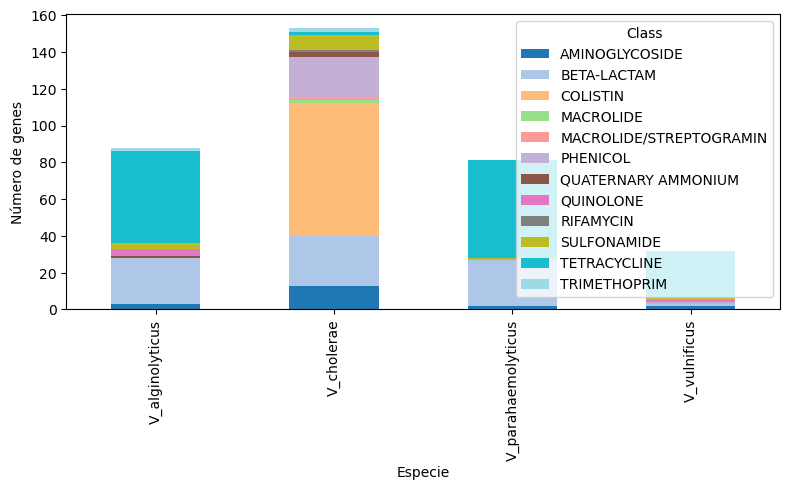

In [14]:
import matplotlib.pyplot as plt
amr.to_csv("../analysis/amrfinder_clean.tsv", sep="\t", index=False)

freq = (
    amr.groupby(['Species','Class'])
       .size()
       .unstack(fill_value=0)
)

freq.plot(kind='bar', stacked=True, colormap='tab20', figsize=(8,5))

plt.ylabel("Número de genes")
plt.xlabel("Especie")
plt.tight_layout()
plt.savefig("../analysis/stacked_clases_resistencia.png", dpi=300)
plt.show()